In [6]:
!pip install ipywidgets

In [98]:
import torch
from torch import nn

import math
import matplotlib.pyplot as plt

In [99]:
torch.manual_seed(111)

In [100]:
train_data_length = 1024
# create the 2d area of zeros
train_data = torch.zeros((train_data_length, 2))
# updating the first column to make the shape
train_data[:, 0] = 2 * math.pi * torch.rand(train_data_length)
# update the second column
train_data[:, 1] = torch.sin(train_data[:, 0])
# add label to data
train_labels = torch.zeros(train_data_length)
# Merge the train data and labels
train_set = [
    (train_data[i], train_labels[i]) for i in range(train_data_length)
]

In [101]:
train_labels

tensor([0., 0., 0.,  ..., 0., 0., 0.])

In [102]:
train_data

tensor([[ 4.4960, -0.9767],
        [ 5.7428, -0.5145],
        [ 1.7710,  0.9800],
        ...,
        [ 4.4772, -0.9725],
        [ 3.2305, -0.0887],
        [ 4.0663, -0.7984]])

In [103]:
train_set = [
    (train_data[i], train_labels[i]) for i in range(train_data_length)
]

In [104]:
train_set[1:10]

[(tensor([ 5.7428, -0.5145]), tensor(0.)),
 (tensor([1.7710, 0.9800]), tensor(0.)),
 (tensor([1.6217, 0.9987]), tensor(0.)),
 (tensor([ 3.9654, -0.7337]), tensor(0.)),
 (tensor([ 3.7702, -0.5881]), tensor(0.)),
 (tensor([ 5.8509, -0.4190]), tensor(0.)),
 (tensor([1.3527, 0.9763]), tensor(0.)),
 (tensor([ 3.7905, -0.6043]), tensor(0.)),
 (tensor([ 4.6042, -0.9942]), tensor(0.))]

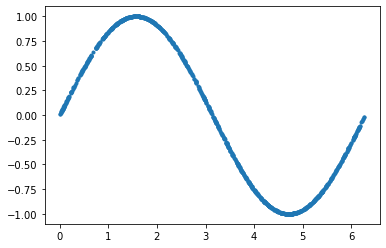

In [105]:
plt.plot(train_data[:, 0], train_data[:, 1], ".")

In [106]:
batch_size = 32
train_loader = torch.utils.data.DataLoader(
    train_set, batch_size=batch_size, shuffle=True
)

In [39]:
train_loader

In [40]:
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(2, 556),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(556, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            
            nn.Linear(64, 1),
            nn.Sigmoid(),
        )

    def forward(self, x):
        output = self.model(x)
        return output

In [41]:
discriminator = Discriminator()

In [42]:
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(2, 16),
            nn.ReLU(),
            nn.Linear(16, 32),
            nn.ReLU(),
            nn.Linear(32, 2),
        )

    def forward(self, x):
        output = self.model(x)
        return output

generator = Generator()

In [43]:
lr = 0.001
num_epochs = 300
loss_function = nn.BCELoss()

In [44]:
optimizer_discriminator = torch.optim.Adam(discriminator.parameters(), lr=lr)
optimizer_generator = torch.optim.Adam(generator.parameters(), lr=lr)

In [95]:
disciminated_samples = []

In [96]:
for epoch in range(num_epochs):
    for n, (real_samples, _) in enumerate(train_loader):
        # Data for training the discriminator
        real_samples_labels = torch.ones((batch_size, 1))
        latent_space_samples = torch.randn((batch_size, 2))
        generated_samples = generator(latent_space_samples)
        generated_samples_labels = torch.zeros((batch_size, 1))
        all_samples = torch.cat((real_samples, generated_samples))
        all_samples_labels = torch.cat(
            (real_samples_labels, generated_samples_labels)
        )
        disciminated_samples.append(all_samples)

        # Training the discriminator
        discriminator.zero_grad()
        output_discriminator = discriminator(all_samples)
        loss_discriminator = loss_function(
            output_discriminator, all_samples_labels)
        loss_discriminator.backward()
        optimizer_discriminator.step()

        # Data for training the generator
        latent_space_samples = torch.randn((batch_size, 2))

        # Training the generator
        generator.zero_grad()
        generated_samples = generator(latent_space_samples)
        output_discriminator_generated = discriminator(generated_samples)
        loss_generator = loss_function(
            output_discriminator_generated, real_samples_labels
        )
        loss_generator.backward()
        optimizer_generator.step()

        # Show loss
        if epoch % 10 == 0 and n == batch_size - 1:
            print(f"Epoch: {epoch} Loss D.: {loss_discriminator}")
            print(f"Epoch: {epoch} Loss G.: {loss_generator}")

Epoch: 0 Loss D.: 0.6817678809165955
Epoch: 0 Loss G.: 0.7590656876564026
Epoch: 10 Loss D.: 0.7126155495643616
Epoch: 10 Loss G.: 0.7482556700706482
Epoch: 20 Loss D.: 0.694441020488739
Epoch: 20 Loss G.: 0.7263242602348328
Epoch: 30 Loss D.: 0.6352444887161255
Epoch: 30 Loss G.: 0.6726095676422119
Epoch: 40 Loss D.: 0.7847800850868225
Epoch: 40 Loss G.: 0.6755409240722656
Epoch: 50 Loss D.: 0.6648397445678711
Epoch: 50 Loss G.: 0.8024115562438965
Epoch: 60 Loss D.: 0.6671595573425293
Epoch: 60 Loss G.: 0.7411771416664124
Epoch: 70 Loss D.: 0.6817998290061951
Epoch: 70 Loss G.: 0.7288526296615601
Epoch: 80 Loss D.: 0.6686842441558838
Epoch: 80 Loss G.: 0.6711235046386719
Epoch: 90 Loss D.: 0.6301401257514954
Epoch: 90 Loss G.: 0.7676410675048828
Epoch: 100 Loss D.: 0.6237840056419373
Epoch: 100 Loss G.: 1.0856808423995972
Epoch: 110 Loss D.: 0.5493649840354919
Epoch: 110 Loss G.: 0.9708641767501831
Epoch: 120 Loss D.: 0.6791068911552429
Epoch: 120 Loss G.: 0.6940236687660217
Epoch: 13

In [107]:
# disciminated_samples

In [110]:
latent_space_samples = torch.randn(50, 2)
generated_samples = generator(latent_space_samples)

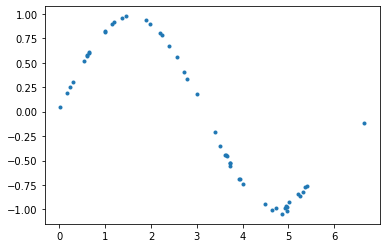

In [111]:
generated_samples = generated_samples.detach()
plt.plot(generated_samples[:, 0], generated_samples[:, 1], ".")

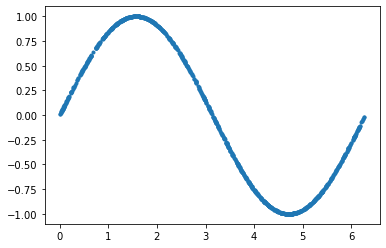

In [48]:
plt.plot(train_data[:, 0], train_data[:, 1], ".")